На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [19]:
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_excel('AB_Test_Results (2) (1).xlsx')

In [4]:
data

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [29]:
len(data['USER_ID'].unique())

6324

In [35]:
data['VARIANT_NAME'].value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [36]:
data.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [7]:
new_data = data[data['REVENUE'] > 0]
new_data

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


In [31]:
new_data[data['VARIANT_NAME']=='variant'].describe()

,USER_ID,REVENUE
count,72.000000,72.000000
mean,5306.958333,4.881528
std,3116.544256,9.913973
min,56.000000,0.020000
25%,2707.500000,1.245000
50%,5721.000000,2.170000
75%,7963.750000,3.972500
max,9996.000000,58.630000


In [14]:
new_data[data['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,80.000000,80.000000
mean,4461.950000,8.037500
std,2826.386242,22.498124
min,124.000000,0.020000
25%,2037.500000,1.515000
50%,4327.000000,2.960000
75%,6636.750000,6.657500
max,9766.000000,196.010000


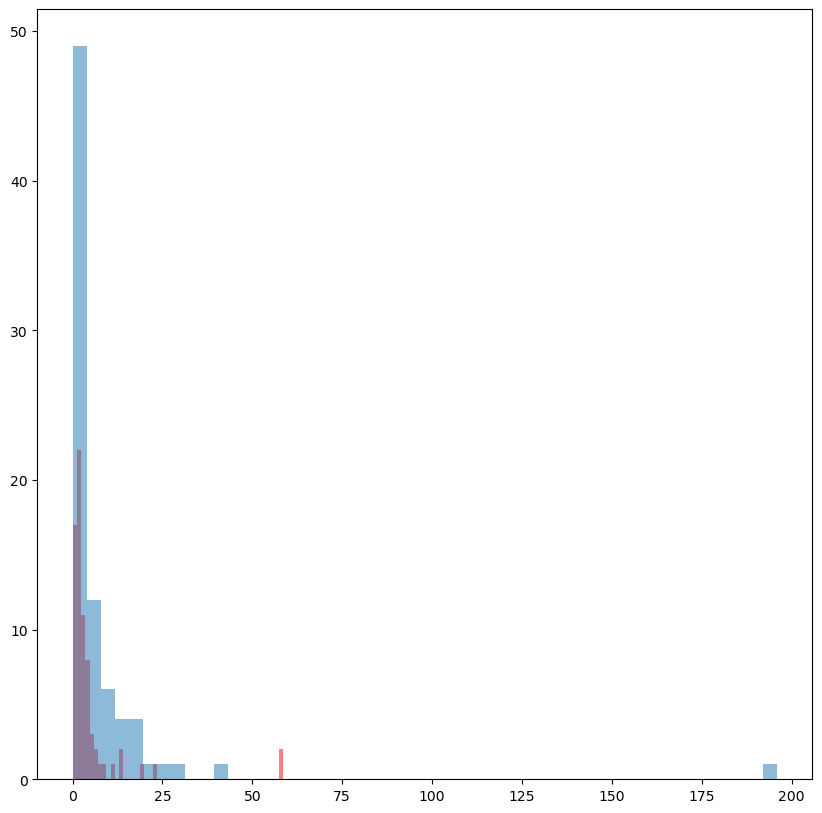

In [17]:
plt.figure(figsize=(10, 10))
control_visit_all = new_data['REVENUE'][data['VARIANT_NAME']=='variant']
test_visit_all = new_data['REVENUE'][data['VARIANT_NAME']=='control']


plt.hist(control_visit_all, color='r', bins=50, alpha = 0.5)
plt.hist(test_visit_all,  bins=50, alpha = 0.5)


plt.show()

Распределение ненормальное, метрика количественная 2 независимых групп, поэтому проверяю гипотезу через критерии Манна-Уитни и t-тест.  

In [21]:
stats.mannwhitneyu(control_visit_all, test_visit_all)

MannwhitneyuResult(statistic=2404.0, pvalue=0.07924299810603061)

pvalue=0.079 > 0.05 => 
статистически значимых различий нет.

In [25]:
stats.ttest_ind(control_visit_all, test_visit_all)

Ttest_indResult(statistic=-1.0979410100804985, pvalue=0.27398955098678834)

pvalue=0.27 > 0.05 => 
статистически значимых различий нет.

### Вывод: 
Результаты эксперимента не принесли своих плодов, доход в ходе эксперимента не вырос, поэтому этот тест не нужно внедрять в основной продукт. 